In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading train dataset
customer_df=pd.read_csv("train.csv",  encoding = "ISO-8859-1")

In [3]:
customer_df.head()

customer_id  customer_visit_score  customer_product_search_score  \
0      csid_1             13.168425                       9.447662   
1      csid_2             17.092979                       7.329056   
2      csid_3             17.505334                       5.143676   
3      csid_4             31.423381                       4.917740   
4      csid_5             11.909502                       4.237073   

   customer_ctr_score  customer_stay_score  customer_frequency_score  \
0           -0.070203            -0.139541                  0.436956   
1            0.153298            -0.102726                  0.380340   
2            0.106709             0.262834                  0.417648   
3           -0.020226            -0.100526                  0.778130   
4            0.187178             0.172891                  0.162067   

   customer_product_variation_score  customer_order_score  \
0                          4.705761              2.537985   
1                          4.205138              4.193444   
2                          4.479070              3.878971   
3                          5.055535              2.708940   
4                          3.445247              3.677360   

   customer_affinity_score customer_active_segment  X1  customer_category  
0                 7.959503                       C   F                  0  
1                17.517381                       C   A                  0  
2                12.595155                       C  BA                  0  
3                 4.795073                      AA   F                  0  
4                56.636326                       C  AA                  0

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [5]:
#changing datatype of target variable
customer_df.customer_category=customer_df.customer_category.astype('object')

In [6]:
#dropping customer id since it will not be used in predicting target
customer_df=customer_df.drop(columns='customer_id')

In [7]:
customer_df.head()

customer_visit_score  customer_product_search_score  customer_ctr_score  \
0             13.168425                       9.447662           -0.070203   
1             17.092979                       7.329056            0.153298   
2             17.505334                       5.143676            0.106709   
3             31.423381                       4.917740           -0.020226   
4             11.909502                       4.237073            0.187178   

   customer_stay_score  customer_frequency_score  \
0            -0.139541                  0.436956   
1            -0.102726                  0.380340   
2             0.262834                  0.417648   
3            -0.100526                  0.778130   
4             0.172891                  0.162067   

   customer_product_variation_score  customer_order_score  \
0                          4.705761              2.537985   
1                          4.205138              4.193444   
2                          4.479070              3.878971   
3                          5.055535              2.708940   
4                          3.445247              3.677360   

   customer_affinity_score customer_active_segment  X1 customer_category  
0                 7.959503                       C   F                 0  
1                17.517381                       C   A                 0  
2                12.595155                       C  BA                 0  
3                 4.795073                      AA   F                 0  
4                56.636326                       C  AA                 0

In [8]:
#taking categorical columns into a seperate dataframe
cat_col=customer_df.select_dtypes(include=['object'])
cat_col.columns

Index(['customer_active_segment', 'X1', 'customer_category'], dtype='object')

In [9]:
#taking continuous into a seperate dataframe

cont_col=customer_df.select_dtypes(include=['int64','float64'])
cont_col.columns

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score'],
      dtype='object')

In [10]:
customer_df.shape

(10738, 11)

In [11]:
# checking columns cotaiing null values
cols_cont_na=customer_df[cont_col.columns].isna().any()
cols_cont_na

customer_visit_score                False
customer_product_search_score        True
customer_ctr_score                  False
customer_stay_score                  True
customer_frequency_score            False
customer_product_variation_score     True
customer_order_score                 True
customer_affinity_score             False
dtype: bool

In [12]:
# copying the continuous value columns containing null values into a sperate dataframe
cols_cont_na=customer_df[cont_col.columns].loc[:,customer_df[cont_col.columns].isna().any()]


In [13]:
cols_cont_na

customer_product_search_score  customer_stay_score  \
0                           9.447662            -0.139541   
1                           7.329056            -0.102726   
2                           5.143676             0.262834   
3                           4.917740            -0.100526   
4                           4.237073             0.172891   
...                              ...                  ...   
10733                       6.701514            -0.017332   
10734                       6.497796            -0.047211   
10735                       7.799880            -0.032765   
10736                       5.588302             0.081586   
10737                       4.478301             0.381349   

       customer_product_variation_score  customer_order_score  
0                              4.705761              2.537985  
1                              4.205138              4.193444  
2                              4.479070              3.878971  
3                              5.055535              2.708940  
4                              3.445247              3.677360  
...                                 ...                   ...  
10733                          7.003663              3.027084  
10734                          5.407507              3.104172  
10735                          5.598486              2.403051  
10736                          3.616492              4.972243  
10737                          4.181092              4.469215  

[10738 rows x 4 columns]

In [14]:
#checking the correlating matrix of the features
corr=customer_df[cont_col.columns].corr().abs()
corr

customer_visit_score  \
customer_visit_score                          1.000000   
customer_product_search_score                 0.274672   
customer_ctr_score                            0.569430   
customer_stay_score                           0.474176   
customer_frequency_score                      0.209270   
customer_product_variation_score              0.220016   
customer_order_score                          0.170497   
customer_affinity_score                       0.118925   

                                  customer_product_search_score  \
customer_visit_score                                   0.274672   
customer_product_search_score                          1.000000   
customer_ctr_score                                     0.415910   
customer_stay_score                                    0.414855   
customer_frequency_score                               0.023031   
customer_product_variation_score                       0.066274   
customer_order_score                                   0.051181   
customer_affinity_score                                0.044181   

                                  customer_ctr_score  customer_stay_score  \
customer_visit_score                        0.569430             0.474176   
customer_product_search_score               0.415910             0.414855   
customer_ctr_score                          1.000000             0.909248   
customer_stay_score                         0.909248             1.000000   
customer_frequency_score                    0.419461             0.400374   
customer_product_variation_score            0.448071             0.406516   
customer_order_score                        0.342506             0.311451   
customer_affinity_score                     0.232876             0.210629   

                                  customer_frequency_score  \
customer_visit_score                              0.209270   
customer_product_search_score                     0.023031   
customer_ctr_score                                0.419461   
customer_stay_score                               0.400374   
customer_frequency_score                          1.000000   
customer_product_variation_score                  0.702688   
customer_order_score                              0.533142   
customer_affinity_score                           0.326201   

                                  customer_product_variation_score  \
customer_visit_score                                      0.220016   
customer_product_search_score                             0.066274   
customer_ctr_score                                        0.448071   
customer_stay_score                                       0.406516   
customer_frequency_score                                  0.702688   
customer_product_variation_score                          1.000000   
customer_order_score                                      0.694476   
customer_affinity_score                                   0.525783   

                                  customer_order_score  \
customer_visit_score                          0.170497   
customer_product_search_score                 0.051181   
customer_ctr_score                            0.342506   
customer_stay_score                           0.311451   
customer_frequency_score                      0.533142   
customer_product_variation_score              0.694476   
customer_order_score                          1.000000   
customer_affinity_score                       0.763861   

                                  customer_affinity_score  
customer_visit_score                             0.118925  
customer_product_search_score                    0.044181  
customer_ctr_score                               0.232876  
customer_stay_score                              0.210629  
customer_frequency_score                         0.326201  
customer_product_variation_score                 0.525783  
customer_order_score                             0.763861  
customer_affinity_sc

In [15]:
# imputing missing values of continuous columns by linear regression technique using the most correlated feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for col in cols_cont_na.columns:
    print('Feature '+col )
    corr1=corr[col].sort_values(axis=0,ascending=False)
    print(corr1)
    feature=corr1.index[1]
    print(feature)
    df_pred=customer_df[cont_col.columns].loc[customer_df[col].notna()]
    X=df_pred[[feature]]
    Y=df_pred[col]
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)
    lm=LinearRegression()
    lm.fit(X_train,Y_train)
    y_pred=lm.predict(X_test)
    customer_df.loc[customer_df[col].isna(),col]=lm.predict(customer_df[[feature]])[customer_df[col].isna()]
    print(customer_df.loc[customer_df[col].isna()])


    

Feature customer_product_search_score
customer_product_search_score       1.000000
customer_ctr_score                  0.415910
customer_stay_score                 0.414855
customer_visit_score                0.274672
customer_product_variation_score    0.066274
customer_order_score                0.051181
customer_affinity_score             0.044181
customer_frequency_score            0.023031
Name: customer_product_search_score, dtype: float64
customer_ctr_score
Empty DataFrame
Columns: [customer_visit_score, customer_product_search_score, customer_ctr_score, customer_stay_score, customer_frequency_score, customer_product_variation_score, customer_order_score, customer_affinity_score, customer_active_segment, X1, customer_category]
Index: []
Feature customer_stay_score
customer_stay_score                 1.000000
customer_ctr_score                  0.909248
customer_visit_score                0.474176
customer_product_search_score       0.414855
customer_product_variation_score    0.

In [16]:
# checking whether any null row is present after imputing
cols_cont_na=customer_df[cont_col.columns].isna().any()
cols_cont_na

customer_visit_score                False
customer_product_search_score       False
customer_ctr_score                  False
customer_stay_score                 False
customer_frequency_score            False
customer_product_variation_score    False
customer_order_score                False
customer_affinity_score             False
dtype: bool

In [17]:
# checking whether categorical columns contain null values
cols_cat_na=customer_df[cat_col.columns].isna().any()
cols_cat_na

customer_active_segment     True
X1                          True
customer_category          False
dtype: bool

In [18]:
# extracting the columns containg null values into a seperate dataframe
cols_cat_na=customer_df[cat_col.columns].loc[:,customer_df[cat_col.columns].isna().any()]
cols_cat_na.columns

Index(['customer_active_segment', 'X1'], dtype='object')

In [19]:
cont_col.columns

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score'],
      dtype='object')

In [20]:
# imputing the null values of the categorical columns by KNN technique which takes the mode of the k -nearest neighbours to predict the missing value
from sklearn.neighbors import KNeighborsClassifier

for col in cols_cat_na.columns:
    print('Feature '+col )
    df_pred=customer_df.loc[customer_df[col].notna()]
    Y=df_pred[col]
    X=df_pred[cont_col.columns]
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)  
    lm=KNeighborsClassifier()
    lm.fit(X_train,Y_train)
    y_pred=lm.predict(X_test)
    customer_df.loc[customer_df[col].isna(),col]=lm.predict(customer_df[['customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score']].astype('object'))[customer_df[col].isna()]
    print(customer_df.loc[customer_df[col].isna()])

Feature customer_active_segment
Empty DataFrame
Columns: [customer_visit_score, customer_product_search_score, customer_ctr_score, customer_stay_score, customer_frequency_score, customer_product_variation_score, customer_order_score, customer_affinity_score, customer_active_segment, X1, customer_category]
Index: []
Feature X1
Empty DataFrame
Columns: [customer_visit_score, customer_product_search_score, customer_ctr_score, customer_stay_score, customer_frequency_score, customer_product_variation_score, customer_order_score, customer_affinity_score, customer_active_segment, X1, customer_category]
Index: []


In [21]:
cols_cat_na=customer_df[cat_col.columns].loc[:,customer_df[cat_col.columns].isna().any()]
cols_cat_na.columns

Index([], dtype='object')

In [22]:
# encoding the categorical columns into binary values by One Hot Encoder
dummy_df=pd.get_dummies(customer_df[['customer_active_segment','X1']],drop_first=True)

In [23]:
dummy_df.head()

customer_active_segment_AA  customer_active_segment_B  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           1                          0   
4                           0                          0   

   customer_active_segment_C  customer_active_segment_D  X1_AA  X1_BA  X1_E  \
0                          1                          0      0      0     0   
1                          1                          0      0      0     0   
2                          1                          0      0      1     0   
3                          0                          0      0      0     0   
4                          1                          0      1      0     0   

   X1_F  
0     1  
1     0  
2     0  
3     1  
4     0

In [24]:
customer_df=pd.concat([customer_df,dummy_df],axis=1)

In [25]:
customer_df.head()

customer_visit_score  customer_product_search_score  customer_ctr_score  \
0             13.168425                       9.447662           -0.070203   
1             17.092979                       7.329056            0.153298   
2             17.505334                       5.143676            0.106709   
3             31.423381                       4.917740           -0.020226   
4             11.909502                       4.237073            0.187178   

   customer_stay_score  customer_frequency_score  \
0            -0.139541                  0.436956   
1            -0.102726                  0.380340   
2             0.262834                  0.417648   
3            -0.100526                  0.778130   
4             0.172891                  0.162067   

   customer_product_variation_score  customer_order_score  \
0                          4.705761              2.537985   
1                          4.205138              4.193444   
2                          4.479070              3.878971   
3                          5.055535              2.708940   
4                          3.445247              3.677360   

   customer_affinity_score customer_active_segment  X1 customer_category  \
0                 7.959503                       C   F                 0   
1                17.517381                       C   A                 0   
2                12.595155                       C  BA                 0   
3                 4.795073                      AA   F                 0   
4                56.636326                       C  AA                 0   

   customer_active_segment_AA  customer_active_segment_B  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           1                          0   
4                           0                          0   

   customer_active_segment_C  customer_active_segment_D  X1_AA  X1_BA  X1_E  \
0                          1                          0      0      0     0   
1                          1                          0      0      0     0   
2                          1                          0      0      1     0   
3                          0                          0      0      0     0   
4                          1                          0      1      0     0   

   X1_F  
0     1  
1     0  
2     0  
3     1  
4     0

In [26]:
customer_df=customer_df.drop(columns=['customer_active_segment','X1'])

In [27]:
customer_df.head()

customer_visit_score  customer_product_search_score  customer_ctr_score  \
0             13.168425                       9.447662           -0.070203   
1             17.092979                       7.329056            0.153298   
2             17.505334                       5.143676            0.106709   
3             31.423381                       4.917740           -0.020226   
4             11.909502                       4.237073            0.187178   

   customer_stay_score  customer_frequency_score  \
0            -0.139541                  0.436956   
1            -0.102726                  0.380340   
2             0.262834                  0.417648   
3            -0.100526                  0.778130   
4             0.172891                  0.162067   

   customer_product_variation_score  customer_order_score  \
0                          4.705761              2.537985   
1                          4.205138              4.193444   
2                          4.479070              3.878971   
3                          5.055535              2.708940   
4                          3.445247              3.677360   

   customer_affinity_score customer_category  customer_active_segment_AA  \
0                 7.959503                 0                           0   
1                17.517381                 0                           0   
2                12.595155                 0                           0   
3                 4.795073                 0                           1   
4                56.636326                 0                           0   

   customer_active_segment_B  customer_active_segment_C  \
0                          0                          1   
1                          0                          1   
2                          0                          1   
3                          0                          0   
4                          0                          1   

   customer_active_segment_D  X1_AA  X1_BA  X1_E  X1_F  
0                          0      0      0     0     1  
1                          0      0      0     0     0  
2                          0      0      1     0     0  
3                          0      0      0     0     1  
4                          0      1      0     0     0

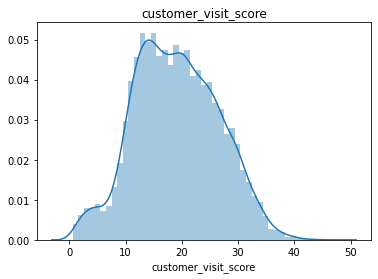

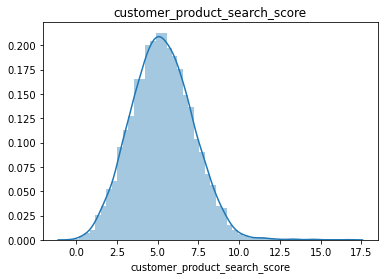

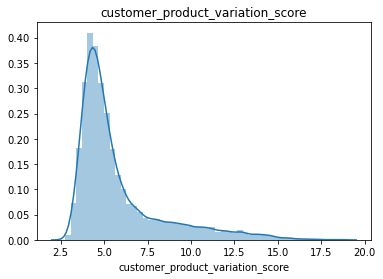

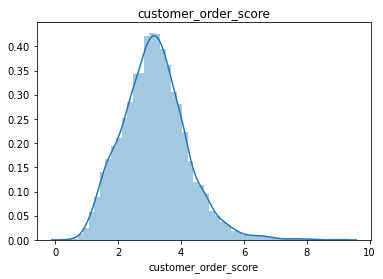

In [28]:
# checking whether the continuous columns are ormally distributed
for i in cont_col.columns:
    sns.distplot(customer_df[i])
    plt.title(i)
    plt.show()

In [29]:
#standardizing the continuous values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_df[cont_col.columns]=scaler.fit_transform(customer_df[cont_col.columns])

In [30]:
customer_df.head()

customer_visit_score  customer_product_search_score  customer_ctr_score  \
0             -0.794218                       2.220430           -0.660158   
1             -0.265250                       1.092848           -0.060657   
2             -0.209671                      -0.070273           -0.185624   
3              1.666262                      -0.190523           -0.526105   
4             -0.963902                      -0.552793            0.030220   

   customer_stay_score  customer_frequency_score  \
0            -0.420810                 -0.346316   
1            -0.390680                 -0.356423   
2            -0.091499                 -0.349762   
3            -0.388879                 -0.285410   
4            -0.165110                 -0.395389   

   customer_product_variation_score  customer_order_score  \
0                         -0.428064             -0.592672   
1                         -0.626202              1.009450   
2                         -0.517785              0.705109   
3                         -0.289630             -0.427226   
4                         -0.926954              0.509994   

   customer_affinity_score customer_category  customer_active_segment_AA  \
0                -0.485152                 0                           0   
1                 0.024280                 0                           0   
2                -0.238073                 0                           0   
3                -0.653815                 0                           1   
4                 2.109310                 0                           0   

   customer_active_segment_B  customer_active_segment_C  \
0                          0                          1   
1                          0                          1   
2                          0                          1   
3                          0                          0   
4                          0                          1   

   customer_active_segment_D  X1_AA  X1_BA  X1_E  X1_F  
0                          0      0      0     0     1  
1                          0      0      0     0     0  
2                          0      0      1     0     0  
3                          0      0      0     0     1  
4                          0      1      0     0     0

In [31]:
# checking whether dataset is balanced or not
len(customer_df.loc[customer_df['customer_category']==1])/len(customer_df)

0.12059973924380704

In [32]:
customer_df['customer_category']=customer_df['customer_category'].astype('int64')

In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#splitting into train and test data
df_train,df_test=train_test_split(customer_df, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
df_test.head()

customer_visit_score  customer_product_search_score  \
8183              -1.466161                      -0.208717   
1639              -1.345618                       1.988805   
6116               1.752925                      -0.827075   
10442              0.199361                      -1.006222   
8879               0.443680                       1.197483   

       customer_ctr_score  customer_stay_score  customer_frequency_score  \
8183             2.875593             1.998980                  2.424931   
1639            -0.048731            -0.280640                 -0.389270   
6116            -0.533505            -0.324438                 -0.352463   
10442           -0.190009            -0.304549                 -0.339153   
8879            -0.512669            -0.328069                 -0.314977   

       customer_product_variation_score  customer_order_score  \
8183                           1.709605             -1.257272   
1639                          -0.706551              1.533298   
6116                          -0.669461              0.154269   
10442                         -0.390645              0.173167   
8879                          -0.138715              0.747272   

       customer_affinity_score  customer_category  customer_active_segment_AA  \
8183                 -0.909272                  1                           0   
1639                  4.626728                  0                           0   
6116                 -0.048541                  0                           1   
10442                 1.240995                  0                           0   
8879                  0.264312                  0                           0   

       customer_active_segment_B  customer_active_segment_C  \
8183                           0                          0   
1639                           0                          1   
6116                           0                          0   
10442                          1                          0   
8879                           0                          1   

       customer_active_segment_D  X1_AA  X1_BA  X1_E  X1_F  
8183                           1      0      0     0     1  
1639                           0      0      0     1     0  
6116                           0      0      0     0     0  
10442                          0      1      0     0     0  
8879                           0      0      1     0     0

#### Implementing a Logistic Regression model to predict the category of the training data to check the accuracy

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

Y_test=df_test.pop('customer_category')
X_test=df_test
Y_train=df_train.pop('customer_category')
X_train=df_train


In [36]:
Y_train

6012    0
399     0
5630    0
4225    0
5505    0
       ..
350     0
79      0
8039    0
6936    0
5640    0
Name: customer_category, Length: 7516, dtype: int64

In [37]:
lm = LogisticRegression(class_weight='balanced')
model_lm = lm.fit(X_train, Y_train)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics


pred_probs_test = model_lm.predict_proba(X_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(Y_test, pred_probs_test))
y_train_pred_final = pd.DataFrame({'customer_category':Y_test.values,'customer_category_Prob':pred_probs_test})
y_train_pred_final['predicted'] = y_train_pred_final.customer_category_Prob.map(lambda x: 1 if x > 0.5 else 0)

print(classification_report(y_train_pred_final.customer_category, y_train_pred_final.predicted))

print(metrics.confusion_matrix(y_train_pred_final.customer_category, y_train_pred_final.predicted))
print("accuracy:", metrics.accuracy_score(y_train_pred_final.customer_category, y_train_pred_final.predicted), "\n")

confusion = metrics.confusion_matrix(y_train_pred_final.customer_category, y_train_pred_final.predicted)
print(confusion)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2825
           1       0.80      0.92      0.85       397

    accuracy                           0.96      3222
   macro avg       0.89      0.94      0.91      3222
weighted avg       0.96      0.96      0.96      3222

[[2732   93]
 [  33  364]]
accuracy: 0.9608938547486033 

[[2732   93]
 [  33  364]]


In [39]:
# learning the best hyperparameters to obtain the best Decision Tree classifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(10,100,10),
    'min_samples_split': range(10,100, 10),
    'max_features': [2,4,6,8,10]}

# instantiate the model (note we are specifying a max_depth)
tree = DecisionTreeClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = tree, param_grid = param_grid, return_train_score=True,
                          cv = 3, n_jobs = -1,verbose = 1)
grid_search.fit(X_train, Y_train)
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 2025 candidates, totalling 6075 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 1620 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 3020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4820 tasks      | elapsed:  1.7min


We can get accuracy of 0.9668713650113978 using {'max_depth': 2, 'max_features': 8, 'min_samples_leaf': 50, 'min_samples_split': 60}


[Parallel(n_jobs=-1)]: Done 6075 out of 6075 | elapsed:  2.0min finished


#### Implementing a Decision Tree model to predict the category of the training data to check the accuracy

In [40]:


# instantiate the model (note we are specifying a max_depth)
tree = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=2,
                             min_samples_leaf=40, 
                             min_samples_split=10,
                             max_features=6,)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_features=6,
                       min_samples_leaf=40, min_samples_split=10)

In [41]:
predictions = tree.predict(X_test)

In [42]:
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2825
           1       0.75      0.92      0.82       397

    accuracy                           0.95      3222
   macro avg       0.87      0.94      0.90      3222
weighted avg       0.96      0.95      0.95      3222

[[2701  124]
 [  33  364]]


In [44]:
# obtaining the best hyperparameters for the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# parameters to build the model on
param_grid = {
    'max_depth': [2,5,8],
    'min_samples_leaf': range(1,50,5),
    'min_samples_split': range(1,50,5),
    'n_estimators': range(1,50,10), 
    'max_features': [2,5,8]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, return_train_score=True,
                          cv = 5, n_jobs = -1,verbose = 1)
grid_search.fit(X_train, Y_train)
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 1448 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2348 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3344 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4524 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 5576 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 6426 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 7376 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 8904 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 10100 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 11350 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 12700 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 14150 tasks   

We can get accuracy of 0.9724585403660763 using {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 31}


#### Implementing a Random Forest model with the optimum hyperparameters to predict the category of the training data to check the accuracy

In [45]:
rfc = RandomForestClassifier(class_weight='balanced',
                             bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=1, 
                             min_samples_split=6,
                             max_features=5,
                             n_estimators=31)
rfc.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=5,
                       min_samples_split=6, n_estimators=31)

In [46]:
predictions = rfc.predict(X_test)

In [47]:
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2825
           1       0.91      0.89      0.90       397

    accuracy                           0.98      3222
   macro avg       0.95      0.94      0.94      3222
weighted avg       0.97      0.98      0.98      3222

[[2789   36]
 [  44  353]]


#### From the above models, it is seen that Random Forest classifier gives us the best results with highest accuracy.
#### So we will predict the category of the test data using the Random Forest classifier

#### Implementing the same steps as above on the test dataset and predicting the customer category using the Random Forest Classifier model

In [48]:
customer_test_df=pd.read_csv("test.csv",  encoding = "ISO-8859-1")


In [49]:
customer_test_df.head()

customer_id  customer_visit_score  customer_product_search_score  \
0  csid_10739             22.500174                       3.702145   
1  csid_10740             13.225950                       3.600102   
2  csid_10741             14.603376                       5.084047   
3  csid_10742             26.149905                       3.025501   
4  csid_10743             19.810630                       5.020400   

   customer_ctr_score  customer_stay_score  customer_frequency_score  \
0            0.118811             0.093253                  0.689237   
1            0.130985             0.053575                  0.142756   
2           -0.004651            -0.036299                  0.333709   
3            0.229740             0.204591                  3.768405   
4           -0.011347            -0.028780                  0.286841   

   customer_product_variation_score  customer_order_score  \
0                          5.786842              3.748009   
1                          3.940359              3.469659   
2                          4.254662              3.855939   
3                          6.942625              2.362421   
4                          4.585513              3.278624   

   customer_affinity_score customer_active_segment  X1  
0                 7.661716                       B  BA  
1                33.999679                       B  AA  
2                33.485630                       B  AA  
3                 0.795372                       B  BA  
4                15.052058                       C  BA

In [50]:
cat_col=customer_test_df.select_dtypes(include=['object'])
cat_col.columns

Index(['customer_id', 'customer_active_segment', 'X1'], dtype='object')

In [51]:
cat_col=cat_col.drop(columns='customer_id')

In [52]:
cat_col.columns

Index(['customer_active_segment', 'X1'], dtype='object')

In [53]:
cont_col=customer_test_df.select_dtypes(include=['int64','float64'])
cont_col.columns

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score'],
      dtype='object')

In [54]:
cols_cont_na_test=customer_test_df[cont_col.columns].isna().any()
cols_cont_na_test



customer_visit_score                False
customer_product_search_score        True
customer_ctr_score                  False
customer_stay_score                  True
customer_frequency_score            False
customer_product_variation_score     True
customer_order_score                 True
customer_affinity_score             False
dtype: bool

In [55]:
cols_cont_na_test=customer_test_df[cont_col.columns].loc[:,customer_test_df[cont_col.columns].isna().any()]
cols_cont_na_test.head()

customer_product_search_score  customer_stay_score  \
0                       3.702145             0.093253   
1                       3.600102             0.053575   
2                       5.084047            -0.036299   
3                       3.025501             0.204591   
4                       5.020400            -0.028780   

   customer_product_variation_score  customer_order_score  
0                          5.786842              3.748009  
1                          3.940359              3.469659  
2                          4.254662              3.855939  
3                          6.942625              2.362421  
4                          4.585513              3.278624

In [56]:
corr_test=customer_test_df[cont_col.columns].corr().abs()
corr_test

customer_visit_score  \
customer_visit_score                          1.000000   
customer_product_search_score                 0.179645   
customer_ctr_score                            0.465360   
customer_stay_score                           0.353102   
customer_frequency_score                      0.097481   
customer_product_variation_score              0.094388   
customer_order_score                          0.057059   
customer_affinity_score                       0.030101   

                                  customer_product_search_score  \
customer_visit_score                                   0.179645   
customer_product_search_score                          1.000000   
customer_ctr_score                                     0.344843   
customer_stay_score                                    0.358047   
customer_frequency_score                               0.028547   
customer_product_variation_score                       0.008829   
customer_order_score                                   0.020381   
customer_affinity_score                                0.020803   

                                  customer_ctr_score  customer_stay_score  \
customer_visit_score                        0.465360             0.353102   
customer_product_search_score               0.344843             0.358047   
customer_ctr_score                          1.000000             0.891798   
customer_stay_score                         0.891798             1.000000   
customer_frequency_score                    0.314639             0.310073   
customer_product_variation_score            0.312455             0.303373   
customer_order_score                        0.217123             0.213600   
customer_affinity_score                     0.138130             0.134962   

                                  customer_frequency_score  \
customer_visit_score                              0.097481   
customer_product_search_score                     0.028547   
customer_ctr_score                                0.314639   
customer_stay_score                               0.310073   
customer_frequency_score                          1.000000   
customer_product_variation_score                  0.732614   
customer_order_score                              0.493908   
customer_affinity_score                           0.299635   

                                  customer_product_variation_score  \
customer_visit_score                                      0.094388   
customer_product_search_score                             0.008829   
customer_ctr_score                                        0.312455   
customer_stay_score                                       0.303373   
customer_frequency_score                                  0.732614   
customer_product_variation_score                          1.000000   
customer_order_score                                      0.659779   
customer_affinity_score                                   0.494822   

                                  customer_order_score  \
customer_visit_score                          0.057059   
customer_product_search_score                 0.020381   
customer_ctr_score                            0.217123   
customer_stay_score                           0.213600   
customer_frequency_score                      0.493908   
customer_product_variation_score              0.659779   
customer_order_score                          1.000000   
customer_affinity_score                       0.771077   

                                  customer_affinity_score  
customer_visit_score                             0.030101  
customer_product_search_score                    0.020803  
customer_ctr_score                               0.138130  
customer_stay_score                              0.134962  
customer_frequency_score                         0.299635  
customer_product_variation_score                 0.494822  
customer_order_score                             0.771077  
customer_affinity_sc

In [58]:
#for col in cols_cont_na_test.columns:
col='customer_stay_score'
print('Feature '+col )
corr1=corr_test[col].sort_values(axis=0,ascending=False)
print(corr1)
feature=corr1.index[1]
print(feature)
customer_test_df[cont_col.columns].loc[customer_test_df[col].isna() & customer_test_df[feature].isna()]

df_pred_test=customer_test_df[cont_col.columns].loc[customer_test_df[col].notna() & customer_test_df[feature].notna()]
df_pred_test.head()

X=df_pred_test[[feature]]
Y=df_pred_test[col]
df_na=X.head()
df_na
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)
lm=LinearRegression()
lm.fit(X_train,Y_train)
y_pred=lm.predict(X_test)

customer_test_df.loc[customer_test_df[col].isna()]

customer_test_df.loc[customer_test_df[col].isna() & customer_test_df[feature].notna(),col]=lm.predict(customer_test_df[[feature]])[customer_test_df[col].isna() & customer_test_df[feature].notna()]



Feature customer_stay_score
customer_stay_score                 1.000000
customer_ctr_score                  0.891798
customer_product_search_score       0.358047
customer_visit_score                0.353102
customer_frequency_score            0.310073
customer_product_variation_score    0.303373
customer_order_score                0.213600
customer_affinity_score             0.134962
Name: customer_stay_score, dtype: float64
customer_ctr_score


In [60]:
#for col in cols_cont_na_test.columns:
col='customer_product_search_score'
print('Feature '+col )
corr1=corr_test[col].sort_values(axis=0,ascending=False)
print(corr1)
feature=corr1.index[1]
print(feature)
customer_test_df[cont_col.columns].loc[customer_test_df[col].isna() & customer_test_df[feature].isna()]

df_pred_test=customer_test_df[cont_col.columns].loc[customer_test_df[col].notna() & customer_test_df[feature].notna()]
df_pred_test.head()

X=df_pred_test[[feature]]
Y=df_pred_test[col]
df_na=X.head()
df_na
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)
lm=LinearRegression()
lm.fit(X_train,Y_train)
y_pred=lm.predict(X_test)

customer_test_df.loc[customer_test_df[col].isna()]

customer_test_df.loc[customer_test_df[col].isna() & customer_test_df[feature].notna(),col]=lm.predict(customer_test_df[[feature]])[customer_test_df[col].isna() & customer_test_df[feature].notna()]



Feature customer_product_search_score
customer_product_search_score       1.000000
customer_stay_score                 0.358047
customer_ctr_score                  0.344843
customer_visit_score                0.179645
customer_frequency_score            0.028547
customer_affinity_score             0.020803
customer_order_score                0.020381
customer_product_variation_score    0.008829
Name: customer_product_search_score, dtype: float64
customer_stay_score


In [61]:
#for col in cols_cont_na_test.columns:
col='customer_product_variation_score'
print('Feature '+col )
corr1=corr_test[col].sort_values(axis=0,ascending=False)
print(corr1)
feature=corr1.index[1]
print(feature)
customer_test_df[cont_col.columns].loc[customer_test_df[col].isna() & customer_test_df[feature].isna()]

df_pred_test=customer_test_df[cont_col.columns].loc[customer_test_df[col].notna() & customer_test_df[feature].notna()]
df_pred_test.head()

X=df_pred_test[[feature]]
Y=df_pred_test[col]
df_na=X.head()
df_na
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)
lm=LinearRegression()
lm.fit(X_train,Y_train)
y_pred=lm.predict(X_test)

customer_test_df.loc[customer_test_df[col].isna()]

customer_test_df.loc[customer_test_df[col].isna() & customer_test_df[feature].notna(),col]=lm.predict(customer_test_df[[feature]])[customer_test_df[col].isna() & customer_test_df[feature].notna()]



Feature customer_product_variation_score
customer_product_variation_score    1.000000
customer_frequency_score            0.732614
customer_order_score                0.659779
customer_affinity_score             0.494822
customer_ctr_score                  0.312455
customer_stay_score                 0.303373
customer_visit_score                0.094388
customer_product_search_score       0.008829
Name: customer_product_variation_score, dtype: float64
customer_frequency_score


In [62]:
#for col in cols_cont_na_test.columns:
col='customer_order_score'
print('Feature '+col )
corr1=corr_test[col].sort_values(axis=0,ascending=False)
print(corr1)
feature=corr1.index[1]
print(feature)
customer_test_df[cont_col.columns].loc[customer_test_df[col].isna() & customer_test_df[feature].isna()]

df_pred_test=customer_test_df[cont_col.columns].loc[customer_test_df[col].notna() & customer_test_df[feature].notna()]
df_pred_test.head()

X=df_pred_test[[feature]]
Y=df_pred_test[col]
df_na=X.head()
df_na
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)
lm=LinearRegression()
lm.fit(X_train,Y_train)
y_pred=lm.predict(X_test)

customer_test_df.loc[customer_test_df[col].isna()]

customer_test_df.loc[customer_test_df[col].isna() & customer_test_df[feature].notna(),col]=lm.predict(customer_test_df[[feature]])[customer_test_df[col].isna() & customer_test_df[feature].notna()]



Feature customer_order_score
customer_order_score                1.000000
customer_affinity_score             0.771077
customer_product_variation_score    0.659779
customer_frequency_score            0.493908
customer_ctr_score                  0.217123
customer_stay_score                 0.213600
customer_visit_score                0.057059
customer_product_search_score       0.020381
Name: customer_order_score, dtype: float64
customer_affinity_score


In [63]:
customer_df.loc[customer_df[col].isna()]


Empty DataFrame
Columns: [customer_visit_score, customer_product_search_score, customer_ctr_score, customer_stay_score, customer_frequency_score, customer_product_variation_score, customer_order_score, customer_affinity_score, customer_category, customer_active_segment_AA, customer_active_segment_B, customer_active_segment_C, customer_active_segment_D, X1_AA, X1_BA, X1_E, X1_F]
Index: []

In [64]:

cols_cat_na=customer_test_df[cat_col.columns].loc[:,customer_test_df[cat_col.columns].isna().any()]
cols_cat_na.columns

Index(['customer_active_segment', 'X1'], dtype='object')

In [65]:
for col in cols_cat_na.columns:
    print('Feature '+col )
    df_pred=customer_test_df.loc[customer_test_df[col].notna()]
    Y=df_pred[col]
    X=df_pred[cont_col.columns]
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)  
    lm=KNeighborsClassifier()
    lm.fit(X_train,Y_train)
    y_pred=lm.predict(X_test)
    customer_test_df.loc[customer_test_df[col].isna(),col]=lm.predict(customer_test_df[['customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score']].astype('object'))[customer_test_df[col].isna()]
    print(customer_test_df.loc[customer_test_df[col].isna()])

Feature customer_active_segment
Empty DataFrame
Columns: [customer_id, customer_visit_score, customer_product_search_score, customer_ctr_score, customer_stay_score, customer_frequency_score, customer_product_variation_score, customer_order_score, customer_affinity_score, customer_active_segment, X1]
Index: []
Feature X1
Empty DataFrame
Columns: [customer_id, customer_visit_score, customer_product_search_score, customer_ctr_score, customer_stay_score, customer_frequency_score, customer_product_variation_score, customer_order_score, customer_affinity_score, customer_active_segment, X1]
Index: []


In [66]:
cols_cat_na=customer_test_df[cat_col.columns].loc[:,customer_test_df[cat_col.columns].isna().any()]
cols_cat_na.columns

Index([], dtype='object')

In [67]:
dummy_df=pd.get_dummies(customer_test_df[['customer_active_segment','X1']],drop_first=True)
customer_test_df=pd.concat([customer_test_df,dummy_df],axis=1)
customer_test_df=customer_test_df.drop(columns=['customer_active_segment','X1'])

In [68]:
customer_test_df.head()

customer_id  customer_visit_score  customer_product_search_score  \
0  csid_10739             22.500174                       3.702145   
1  csid_10740             13.225950                       3.600102   
2  csid_10741             14.603376                       5.084047   
3  csid_10742             26.149905                       3.025501   
4  csid_10743             19.810630                       5.020400   

   customer_ctr_score  customer_stay_score  customer_frequency_score  \
0            0.118811             0.093253                  0.689237   
1            0.130985             0.053575                  0.142756   
2           -0.004651            -0.036299                  0.333709   
3            0.229740             0.204591                  3.768405   
4           -0.011347            -0.028780                  0.286841   

   customer_product_variation_score  customer_order_score  \
0                          5.786842              3.748009   
1                          3.940359              3.469659   
2                          4.254662              3.855939   
3                          6.942625              2.362421   
4                          4.585513              3.278624   

   customer_affinity_score  customer_active_segment_AA  \
0                 7.661716                           0   
1                33.999679                           0   
2                33.485630                           0   
3                 0.795372                           0   
4                15.052058                           0   

   customer_active_segment_B  customer_active_segment_C  \
0                          1                          0   
1                          1                          0   
2                          1                          0   
3                          1                          0   
4                          0                          1   

   customer_active_segment_D  X1_AA  X1_BA  X1_E  X1_F  
0                          0      0      1     0     0  
1                          0      1      0     0     0  
2                          0      1      0     0     0  
3                          0      0      1     0     0  
4                          0      0      1     0     0

In [69]:
customer_test_df[cont_col.columns]=scaler.fit_transform(customer_test_df[cont_col.columns])

In [70]:
customer_test_df.head()

customer_id  customer_visit_score  customer_product_search_score  \
0  csid_10739              0.401090                      -0.948270   
1  csid_10740             -0.927510                      -1.005721   
2  csid_10741             -0.730184                      -0.170239   
3  csid_10742              0.923941                      -1.329230   
4  csid_10743              0.015793                      -0.206073   

   customer_ctr_score  customer_stay_score  customer_frequency_score  \
0            0.029815            -0.124106                 -0.240866   
1            0.076509            -0.168825                 -0.350892   
2           -0.443737            -0.270117                 -0.312446   
3            0.455292             0.001376                  0.379075   
4           -0.469422            -0.261642                 -0.321882   

   customer_product_variation_score  customer_order_score  \
0                          0.145905              0.414247   
1                         -0.645157              0.151294   
2                         -0.510505              0.516207   
3                          0.641060             -0.894695   
4                         -0.368763             -0.029173   

   customer_affinity_score  customer_active_segment_AA  \
0                -0.588355                           0   
1                 0.678976                           0   
2                 0.654241                           0   
3                -0.918750                           0   
4                -0.232746                           0   

   customer_active_segment_B  customer_active_segment_C  \
0                          1                          0   
1                          1                          0   
2                          1                          0   
3                          1                          0   
4                          0                          1   

   customer_active_segment_D  X1_AA  X1_BA  X1_E  X1_F  
0                          0      0      1     0     0  
1                          0      1      0     0     0  
2                          0      1      0     0     0  
3                          0      0      1     0     0  
4                          0      0      1     0     0

In [71]:
col=customer_test_df.columns
col[1:]

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment_AA',
       'customer_active_segment_B', 'customer_active_segment_C',
       'customer_active_segment_D', 'X1_AA', 'X1_BA', 'X1_E', 'X1_F'],
      dtype='object')

In [72]:
predictions_test = tree.predict(customer_test_df[col[1:]])

In [73]:
predictions_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [74]:
output_df = pd.DataFrame(predictions_test,columns =['customer_category'])

In [75]:
output_df.head()

customer_category
0                  0
1                  0
2                  0
3                  1
4                  0

In [76]:
customer_test_df=pd.concat([customer_test_df,output_df],axis=1)


In [77]:
customer_test_df.head()

customer_id  customer_visit_score  customer_product_search_score  \
0  csid_10739              0.401090                      -0.948270   
1  csid_10740             -0.927510                      -1.005721   
2  csid_10741             -0.730184                      -0.170239   
3  csid_10742              0.923941                      -1.329230   
4  csid_10743              0.015793                      -0.206073   

   customer_ctr_score  customer_stay_score  customer_frequency_score  \
0            0.029815            -0.124106                 -0.240866   
1            0.076509            -0.168825                 -0.350892   
2           -0.443737            -0.270117                 -0.312446   
3            0.455292             0.001376                  0.379075   
4           -0.469422            -0.261642                 -0.321882   

   customer_product_variation_score  customer_order_score  \
0                          0.145905              0.414247   
1                         -0.645157              0.151294   
2                         -0.510505              0.516207   
3                          0.641060             -0.894695   
4                         -0.368763             -0.029173   

   customer_affinity_score  customer_active_segment_AA  \
0                -0.588355                           0   
1                 0.678976                           0   
2                 0.654241                           0   
3                -0.918750                           0   
4                -0.232746                           0   

   customer_active_segment_B  customer_active_segment_C  \
0                          1                          0   
1                          1                          0   
2                          1                          0   
3                          1                          0   
4                          0                          1   

   customer_active_segment_D  X1_AA  X1_BA  X1_E  X1_F  customer_category  
0                          0      0      1     0     0                  0  
1                          0      1      0     0     0                  0  
2                          0      1      0     0     0                  0  
3                          0      0      1     0     0                  1  
4                          0      0      1     0     0                  0

In [78]:
final_test_df=customer_test_df[['customer_id','customer_category']]

In [79]:
final_test_df.to_csv('final_prediction.csv',index=False)

#### The final predictions of the customer category on the test dataset have been made and saved along with the respective customer id in a csv file